# 4.10 Coding Etiquette and Exel Reporting

## This script includes task assignements:

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.
### 2. Consider any security implications. Address any PII data before continuing your analysis.
### 3. Create a regional segmentation of the data.
### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
### 5 and 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents; then create an appropriate visualization to show the distribution of profiles
### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 8. Compare your customer profiles with regions and departments. Can you identify a link between them?
### Note: 8. is continued in Part 2 due to memory issues.

## Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.

In [5]:
path = r'C:\Users\rlink\Documents\Instacart Basket Analysis'

In [8]:
big_ords_prods_agg_cust = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'big_ords_prods_agg_cust.pkl'))

In [10]:
big_ords_prods_agg_cust.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'days_most_busy',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 '_merge']

## 2. Consider any security implications. Address any PII data before continuing your analysis.

In [13]:
big_ords_prods_agg_cust.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,...,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,...,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,both
5,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,prior,15,1,...,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,both
6,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,1379,prior,1,5,...,Thomas,Howard,Male,Alaska,61,3/30/2020,1,married,42573,both
7,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,prior,38,4,...,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both
8,1,Chocolate Sandwich Cookies,61,19,5.8,2694698,1480,prior,39,2,...,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both
9,1,Chocolate Sandwich Cookies,61,19,5.8,186761,1494,prior,7,2,...,Kathryn,Hull,Female,Indiana,78,6/29/2017,1,married,49504,both


The PII issue is the first and last name. I would ask for guidance about removing these columns, as the user_id can provide the same functon. For the purpose of this task I will leave them in.

## 3. Create a regional segmentation of the data.

### Create region lists

In [18]:
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [20]:
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [22]:
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [24]:
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

### Create region columns

In [27]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['state'].isin(Northeast),'region']='Northeast'

In [28]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['state'].isin(Midwest),'region']='Midwest'

In [29]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['state'].isin(South),'region']='South'

In [30]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['state'].isin(West),'region']='West'

In [34]:
big_ords_prods_agg_cust.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast
2,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,...,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,both,South
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,...,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,both,West
5,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,prior,15,1,...,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,both,West
6,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,1379,prior,1,5,...,Howard,Male,Alaska,61,3/30/2020,1,married,42573,both,West
7,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,prior,38,4,...,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,South
8,1,Chocolate Sandwich Cookies,61,19,5.8,2694698,1480,prior,39,2,...,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,South
9,1,Chocolate Sandwich Cookies,61,19,5.8,186761,1494,prior,7,2,...,Hull,Female,Indiana,78,6/29/2017,1,married,49504,both,Midwest


In [37]:
big_ords_prods_agg_cust['region'].value_counts(dropna=False)

region
South        6477033
West         4975600
Midwest      4559382
Northeast    3432650
Name: count, dtype: int64

In [39]:
region_spending_crosstab=pd.crosstab(big_ords_prods_agg_cust['region'],big_ords_prods_agg_cust['spending_flag'],dropna=False)

In [40]:
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,93581,4465801
Northeast,64980,3367670
South,125584,6351449
West,96023,4879577


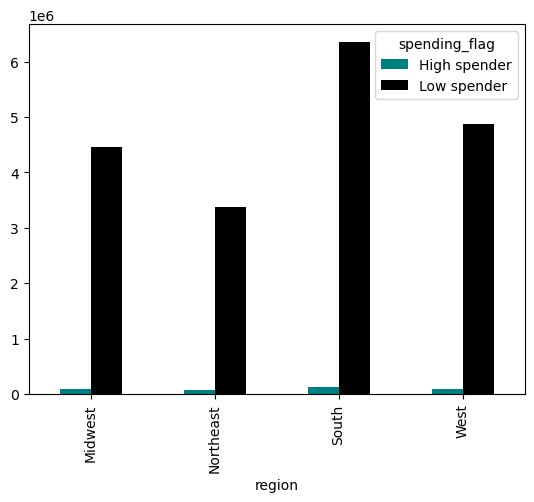

In [41]:
bar_spending_flag=region_spending_crosstab.plot.bar(color=['teal','black'])

Across all regions the vast majority of spenders fall into the "Low Spender" category.

In [43]:
bar_spending_flag.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_spending_flag.png'))

## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [45]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['max_order']>=5,'customer_activity_flag']='High Activity'

In [46]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['max_order']<5,'customer_activity_flag']='Low Activity'

In [47]:
big_ords_prods_agg_cust.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,customer_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,High Activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,High Activity
2,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Low Activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,...,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,both,South,High Activity
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,...,Male,Oregon,72,3/30/2018,1,married,153843,both,West,High Activity
5,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,prior,15,1,...,Male,Oregon,72,3/30/2018,1,married,153843,both,West,High Activity
6,1,Chocolate Sandwich Cookies,61,19,5.8,1798115,1379,prior,1,5,...,Male,Alaska,61,3/30/2020,1,married,42573,both,West,High Activity
7,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,prior,38,4,...,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,South,High Activity
8,1,Chocolate Sandwich Cookies,61,19,5.8,2694698,1480,prior,39,2,...,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,South,High Activity
9,1,Chocolate Sandwich Cookies,61,19,5.8,186761,1494,prior,7,2,...,Female,Indiana,78,6/29/2017,1,married,49504,both,Midwest,High Activity


In [48]:
big_ords_prods_agg_cust['customer_activity_flag'].value_counts(dropna=False)

customer_activity_flag
High Activity    18580751
Low Activity       863914
Name: count, dtype: int64

Make sure you export this sample

In [54]:
big_ords_prods_cust_high_activity=big_ords_prods_agg_cust[big_ords_prods_agg_cust['customer_activity_flag']=='High Activity']

In [55]:
big_ords_prods_cust_high_activity.shape

(18580751, 36)

In [60]:
big_ords_prods_cust_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','big_ords_prods_cust_high_activity.pkl'))

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [65]:
big_ords_prods_agg_cust['age'].describe()

count    1.944466e+07
mean     4.946671e+01
std      1.848626e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

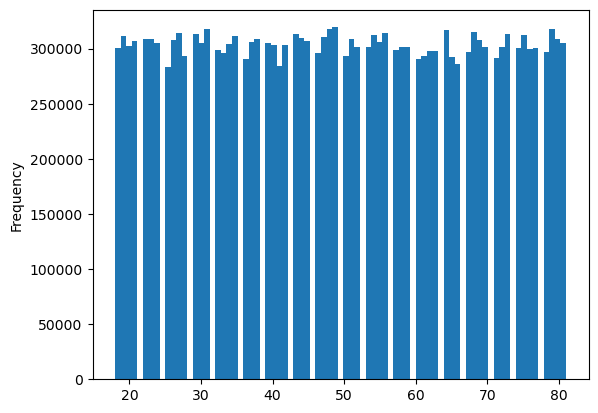

In [67]:
big_ords_prods_agg_cust['age'].plot.hist(bins=81)

### Create Pie Chart for age groups

In [70]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['age']<=30,'age_group']='Young'

In [71]:
big_ords_prods_agg_cust.loc[(big_ords_prods_agg_cust['age']>30)&(big_ords_prods_agg_cust['age']<=60),'age_group']='Middle-Age'

In [73]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['age']>60,'age_group']='Senior'

In [76]:
big_ords_prods_agg_cust['age_group'].value_counts(dropna=False)

age_group
Middle-Age    9132492
Senior        6351624
Young         3960549
Name: count, dtype: int64

In [78]:
age_group_counts = big_ords_prods_agg_cust['age_group'].value_counts()

In [79]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

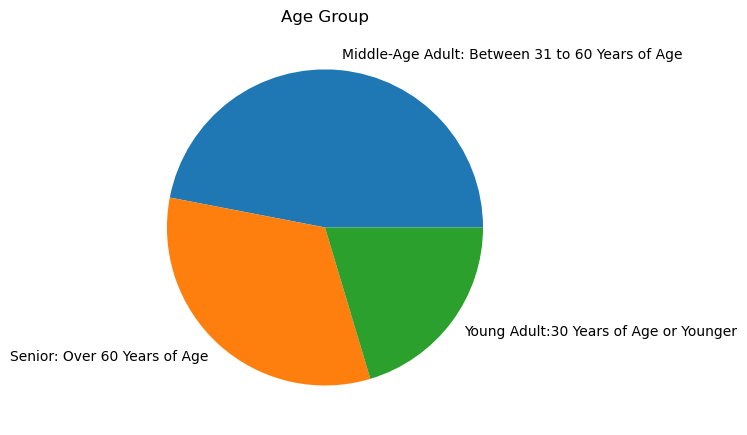

In [82]:
age_group_pie_chart = age_group_counts.plot.pie(labels=('Middle-Age Adult: Between 31 to 60 Years of Age','Senior: Over 60 Years of Age','Young Adult:30 Years of Age or Younger'))
plt.title('Age Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [84]:
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_pie_chart.png'))

### Create bar chart for age groups

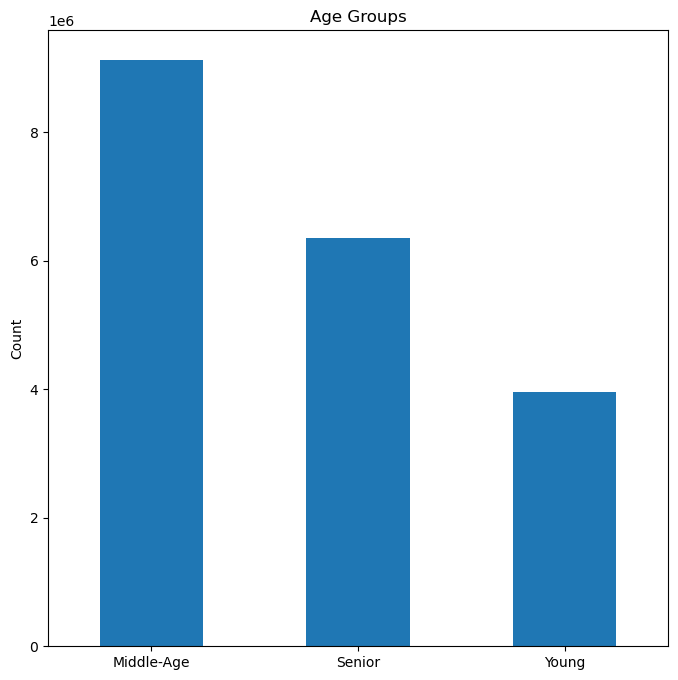

In [87]:
age_group_counts = big_ords_prods_agg_cust['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_bar = age_group_counts.plot.bar(rot=0)
plt.title('Age Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [88]:
age_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_bar_chart.png'))

<Axes: ylabel='Frequency'>

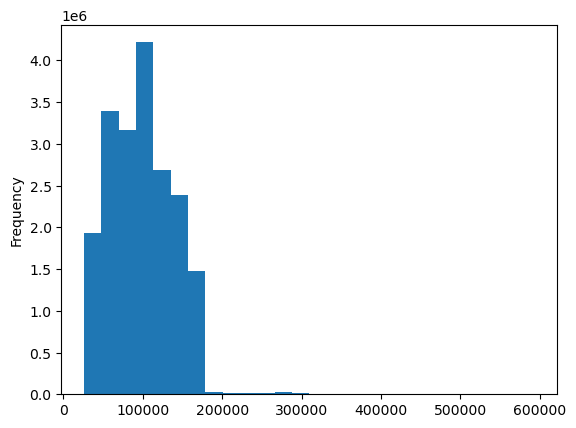

In [89]:
big_ords_prods_agg_cust['income'].plot.hist(bins=26)

In [92]:
big_ords_prods_agg_cust['income'].describe()

count    1.944466e+07
mean     9.943595e+04
std      4.304646e+04
min      2.590300e+04
25%      6.700600e+04
50%      9.661000e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

### Create income groups

In [94]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['income']<=65000,'income_group']='Low Income'

In [95]:
big_ords_prods_agg_cust.loc[(big_ords_prods_agg_cust['income']>65000)&(big_ords_prods_agg_cust['income']<=130000),'income_group']='Middle Income'

In [98]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['income']>130000,'income_group']='High Income'

In [99]:
big_ords_prods_agg_cust['income_group'].value_counts(dropna=False)

income_group
Middle Income    10303944
High Income       4628404
Low Income        4512317
Name: count, dtype: int64

### Create pie chart for income groups

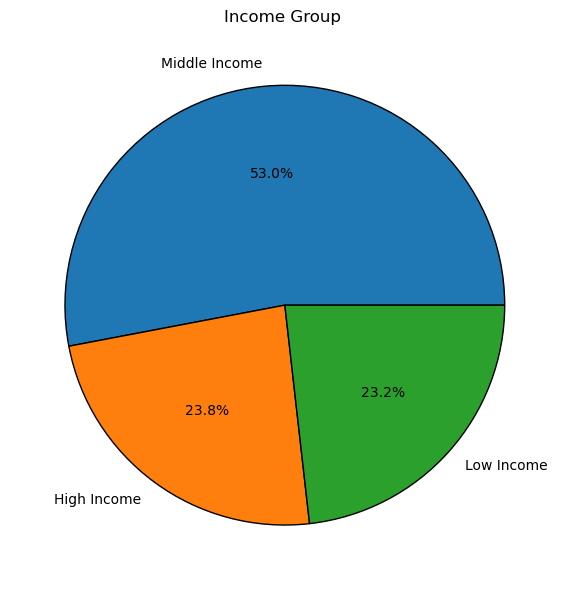

In [104]:
income_group_counts = big_ords_prods_agg_cust['income_group'].value_counts()
plt.figure(figsize = (6,6))
income_group_pie_chart = income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops = {'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [106]:
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_pie.png'))

### Create bar chart by income groups

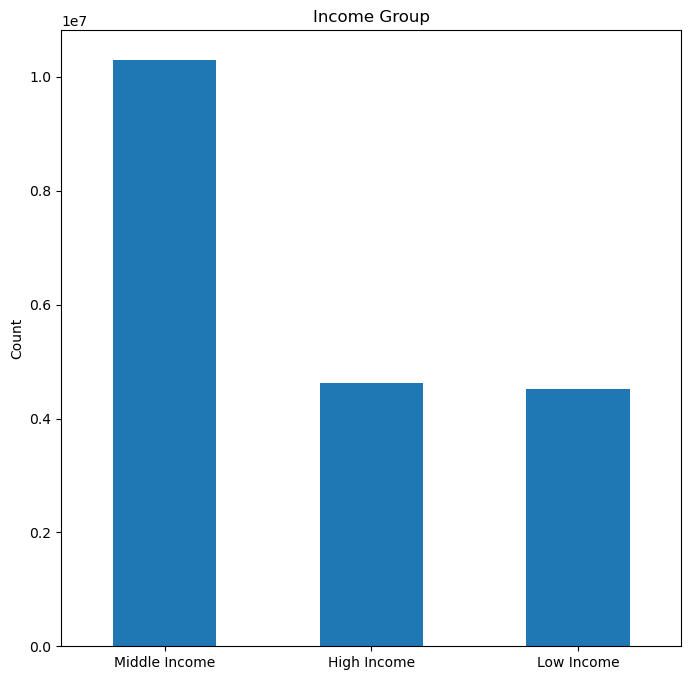

In [110]:
income_group_counts = big_ords_prods_agg_cust['income_group'].value_counts()
plt.figure(figsize=(8,8))
income_group_bar = income_group_counts.plot.bar(rot=0)
plt.title('Income Group')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [111]:
income_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_bar.png'))

### Create number of dependents groups

In [115]:
big_ords_prods_agg_cust['n_dependants'].describe()

count    1.944466e+07
mean     1.502023e+00
std      1.118793e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [117]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['n_dependants']<=1,'dependant_size'] = 'Small'

In [118]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['n_dependants']==2,'dependant_size'] = 'Medium'

In [121]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['n_dependants']>=3,'dependant_size'] = 'Large'

In [123]:
big_ords_prods_agg_cust['dependant_size'].value_counts(dropna=False)

dependant_size
Small     9707859
Large     4881871
Medium    4854935
Name: count, dtype: int64

### Create bar chart of age groups by dependent size

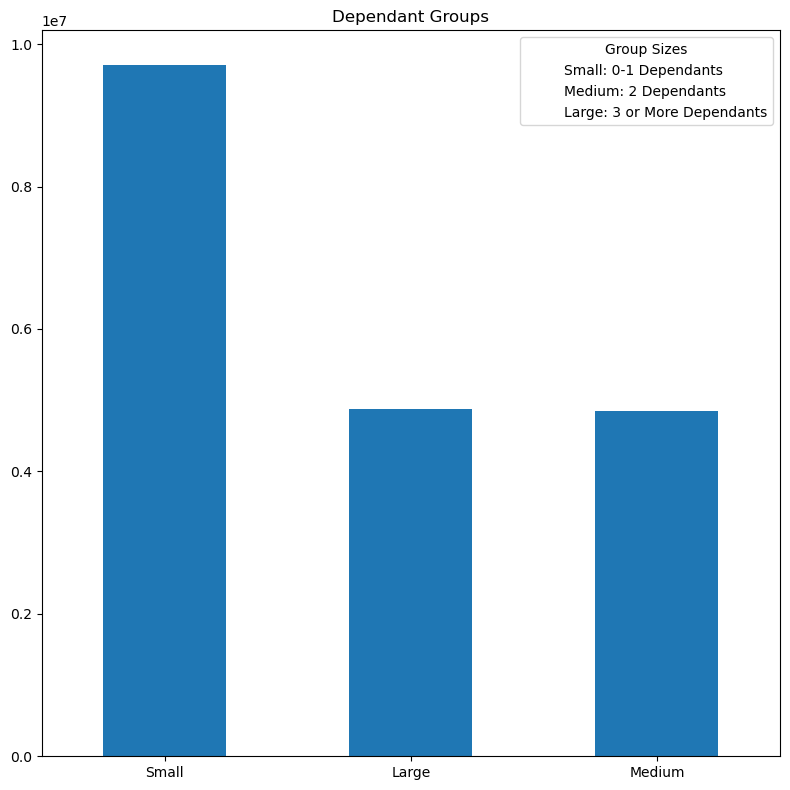

In [126]:
import matplotlib.patches as mpatches
dependants_group_counts = big_ords_prods_agg_cust['dependant_size'].value_counts()
plt.figure(figsize=(8,8))
dependant_group_bar = dependants_group_counts.plot.bar(rot=0)
plt.title('Dependant Groups')
plt.xlabel('')
plt.ylabel('')
small_patch = mpatches.Patch(color='none',label='Small: 0-1 Dependants')
medium_patch = mpatches.Patch(color='none',label='Medium: 2 Dependants')
large_patch = mpatches.Patch(color='none',label='Large: 3 or More Dependants')
plt.legend(handles = [small_patch, medium_patch, large_patch], title = 'Group Sizes')
plt.tight_layout()
plt.show()

In [127]:
dependant_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependant_bar.png'))

### Create order by day of the week bar chart

In [131]:
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

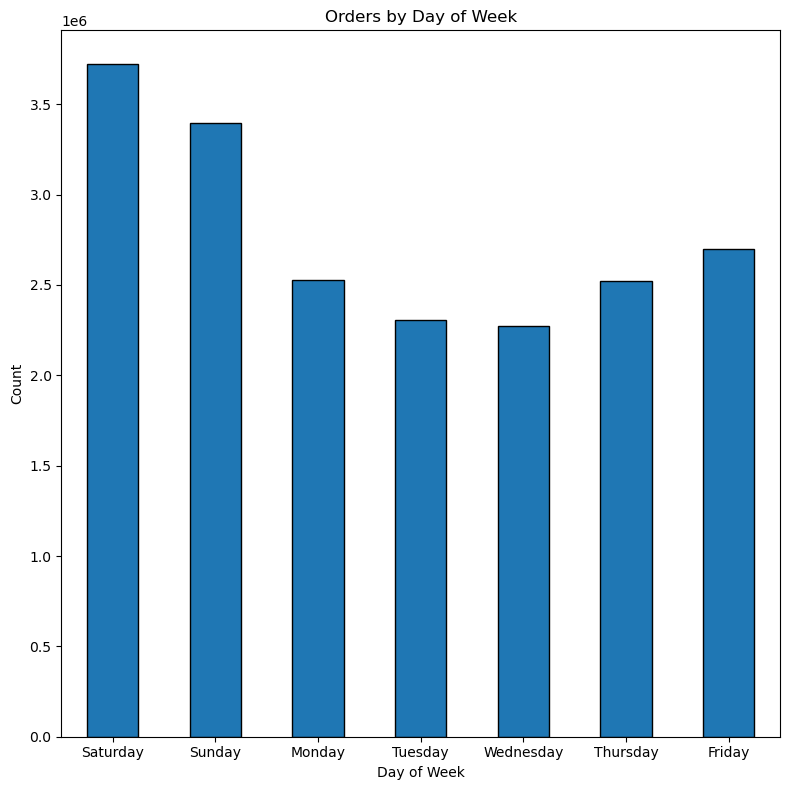

In [133]:
plt.figure(figsize=(8, 8))
orders_by_day_of_week = big_ords_prods_agg_cust['order_dow'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [135]:
orders_by_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_by_day_of_week.png'))

In [137]:
big_ords_prods_agg_cust['order_dow'].describe()

count    1.944466e+07
mean     2.738542e+00
std      2.089937e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_dow, dtype: float64

### Create weekday/weekend flags

In [140]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['order_dow'].isin([0,1]),'week_day_category'] = 'Weekend'

In [141]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['order_dow'].isin([2,3,4,5,6]),'week_day_category'] = 'Weekday'

In [143]:
big_ords_prods_agg_cust['week_day_category'].value_counts(dropna=False)

week_day_category
Weekday    12324221
Weekend     7120444
Name: count, dtype: int64

### Create bar chart of weekday/weekend orders

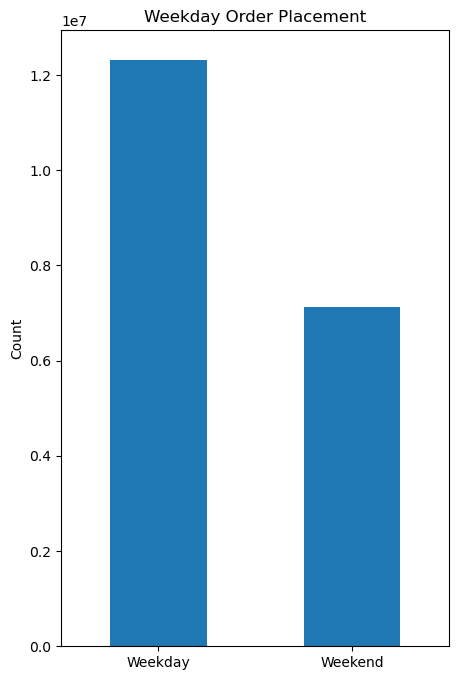

In [147]:
week_day_count = big_ords_prods_agg_cust['week_day_category'].value_counts()
plt.figure(figsize = (5,8))
week_day_order_count_bar=week_day_count.plot.bar(rot=0)
plt.title('Weekday Order Placement')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [148]:
week_day_order_count_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_order_placement_comparison_bar.png'))

### Create pie chart of weekday/weekend orders

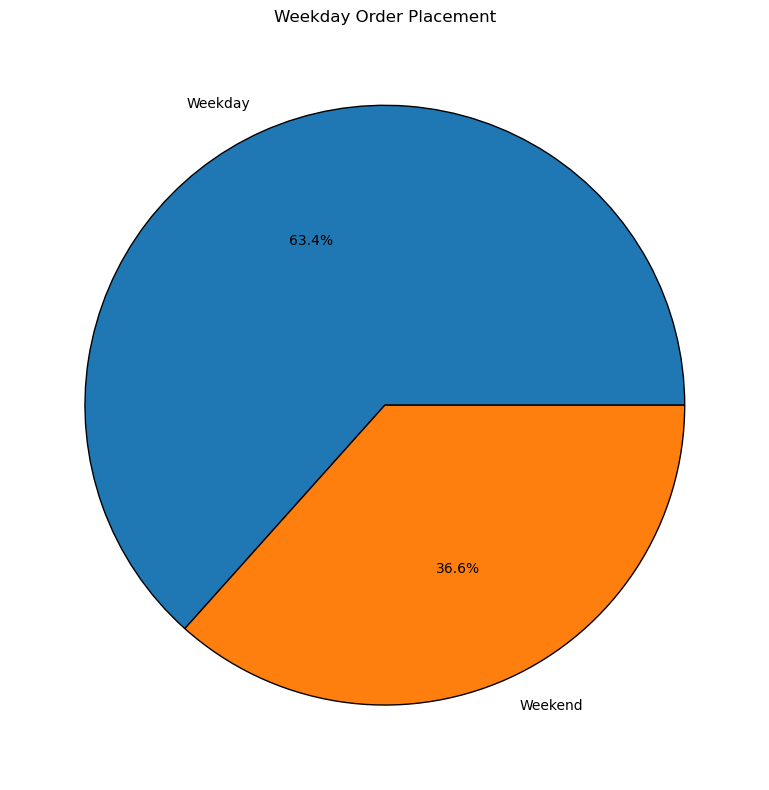

In [152]:
week_day_count = big_ords_prods_agg_cust['week_day_category'].value_counts()
plt.figure(figsize=(8,8))
week_day_order_count_pie = week_day_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Weekday Order Placement')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [153]:
week_day_order_count_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_order_placement_comparison_pie.png'))

### Create order by hour of the day bar chart

In [157]:
big_ords_prods_agg_cust['order_hour_of_day'].describe()

count    1.944466e+07
mean     1.342465e+01
std      4.246372e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

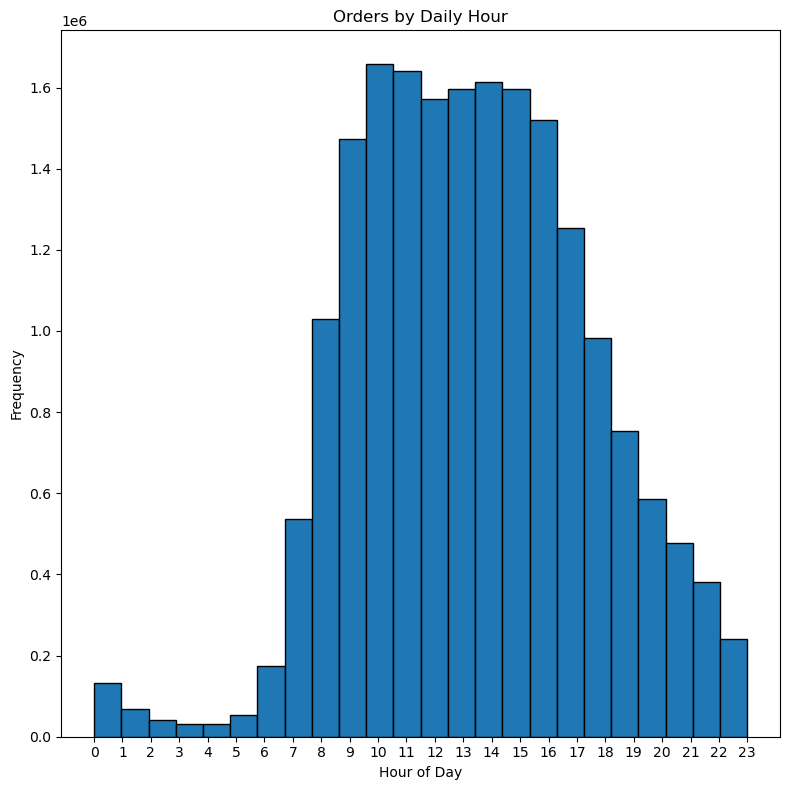

In [159]:
plt.figure(figsize=(8, 8))
ords_hour_by_day = big_ords_prods_agg_cust['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders by Daily Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [160]:
ords_hour_by_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_hour_by_day_hist.png'))

### Create ordering groups

In [164]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['order_hour_of_day']<12,'order_hour_group'] = 'Morning'

In [165]:
big_ords_prods_agg_cust.loc[(big_ords_prods_agg_cust['order_hour_of_day']>=12)&(big_ords_prods_agg_cust['order_hour_of_day']<=17),'order_hour_group'] = 'Afternoon'

In [167]:
big_ords_prods_agg_cust.loc[big_ords_prods_agg_cust['order_hour_of_day']>17,'order_hour_group']='Evening'

In [170]:
big_ords_prods_agg_cust['order_hour_group'].value_counts(dropna=False)

order_hour_group
Afternoon    9153654
Morning      6869506
Evening      3421505
Name: count, dtype: int64

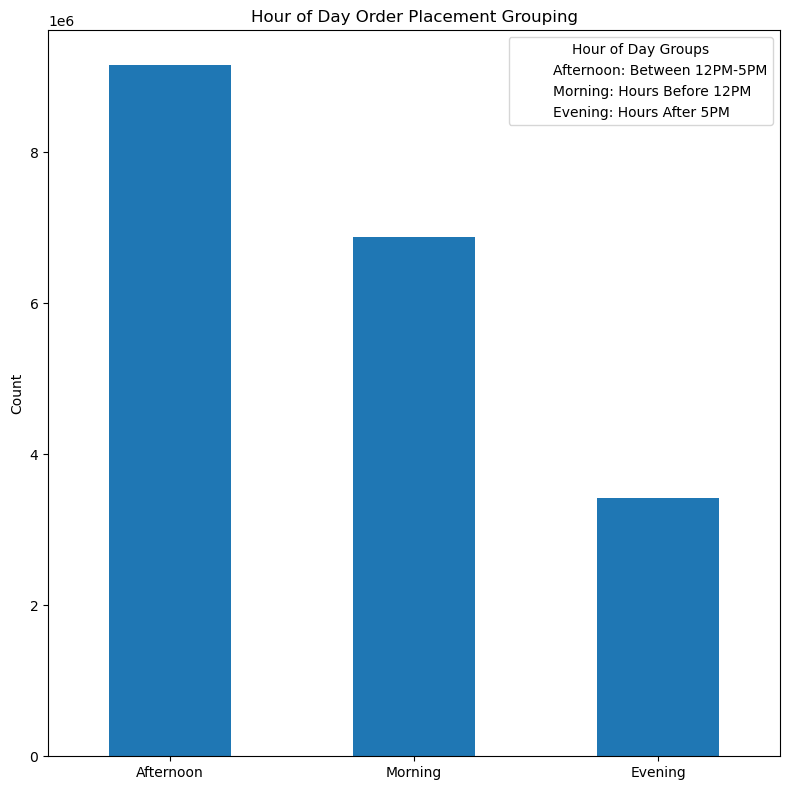

In [172]:
order_hour_group_count = big_ords_prods_agg_cust['order_hour_group'].value_counts()
plt.figure(figsize=(8,8))
order_hour_group_count_bar=order_hour_group_count.plot.bar(rot=0)
plt.title('Hour of Day Order Placement Grouping')
plt.xlabel('')
plt.ylabel('Count')
# Create proxy artists for the legend
small_patch = mpatches.Patch(color='none',label='Afternoon: Between 12PM-5PM')
medium_patch = mpatches.Patch(color='none',label='Morning: Hours Before 12PM')
large_patch = mpatches.Patch(color='none',label='Evening: Hours After 5PM')
# Add the custom legend
plt.legend(handles=[small_patch, medium_patch, large_patch], title='Hour of Day Groups')
plt.tight_layout()
plt.show()
plt.tight_layout
plt.show()

In [173]:
order_hour_group_count_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_hour_group_comparison_bar.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [177]:
big_ords_prods_agg_cust.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'days_most_busy',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 '_merge',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']

### Create an aggregation subset of the customer profile

In [180]:
cust_profile_agg = big_ords_prods_agg_cust.groupby(['user_id','order_number','days_since_prior_order','loyalty_flag','spending_flag','order_frequency','state','region','customer_activity_flag','age_group','income','income_group','marital_status','dependant_size','week_day_category','order_dow','order_hour_group','order_hour_of_day'])['prices'].sum().reset_index()

In [181]:
cust_profile_agg.head()

,user_id,order_number,days_since_prior_order,loyalty_flag,spending_flag,order_frequency,state,region,customer_activity_flag,age_group,income,income_group,marital_status,dependant_size,week_day_category,order_dow,order_hour_group,order_hour_of_day,prices
0,1,2,15.0,New customer,Low spender,Non-frequent customer,Alabama,South,High Activity,Middle-Age,40423,Low Income,married,Large,Weekday,3,Morning,7,31.4
1,1,3,21.0,New customer,Low spender,Non-frequent customer,Alabama,South,High Activity,Middle-Age,40423,Low Income,married,Large,Weekday,3,Afternoon,12,25.0
2,1,4,29.0,New customer,Low spender,Non-frequent customer,Alabama,South,High Activity,Middle-Age,40423,Low Income,married,Large,Weekday,4,Morning,7,18.6
3,1,5,28.0,New customer,Low spender,Non-frequent customer,Alabama,South,High Activity,Middle-Age,40423,Low Income,married,Large,Weekday,4,Afternoon,15,23.4
4,1,6,19.0,New customer,Low spender,Non-frequent customer,Alabama,South,High Activity,Middle-Age,40423,Low Income,married,Large,Weekday,2,Morning,7,4.4


In [182]:
cust_profile_agg.dtypes

user_id                     int64
order_number                int64
days_since_prior_order    float64
loyalty_flag               object
spending_flag              object
order_frequency            object
state                      object
region                     object
customer_activity_flag     object
age_group                  object
income                      int64
income_group               object
marital_status             object
dependant_size             object
week_day_category          object
order_dow                   int64
order_hour_group           object
order_hour_of_day           int64
prices                    float64
dtype: object

In [183]:
user_agg=cust_profile_agg.groupby('user_id').agg({'order_number': ['mean', 'min', 'max'],'days_since_prior_order': ['mean', 'min', 'max'], 'order_dow': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max'],'income':['mean','min','max']})

In [184]:
user_agg

order_number         days_since_prior_order             order_dow      \
                mean min max                   mean   min   max      mean min   
user_id                                                                         
1           6.000000   2  10              19.555556   0.0  30.0  2.555556   1   
2           8.000000   2  14              15.230769   3.0  30.0  2.153846   1   
3           7.000000   2  12              12.090909   7.0  21.0  1.090909   0   
4           3.500000   2   5              13.750000   0.0  21.0  4.500000   4   
5           3.000000   2   4              13.333333  10.0  19.0  1.333333   0   
...              ...  ..  ..                    ...   ...   ...       ...  ..   
206205      2.500000   2   3              20.000000  10.0  30.0  3.500000   2   
206206     35.500000   2  67               3.816667   0.0  15.0  2.416667   0   
206207      9.000000   2  16              14.333333   1.0  30.0  2.333333   0   
206208     25.500000   2  49               7.437500   0.0  20.0  2.687500   0   
206209      7.636364   2  13              18.818182   3.0  30.0  3.000000   1   

            order_hour_of_day             prices                 income  \
        max              mean min max       mean   min    max      mean   
user_id                                                                   
1         4         10.555556   7  16  18.866667   4.4   31.4   40423.0   
2         5         10.538462   9  15  65.423077  17.0  147.7   64940.0   
3         3         16.636364  15  19  34.018182  17.0   65.0   93240.0   
4         5         13.000000  11  15  12.925000   7.5   26.5   45435.0   
5         3         17.333333  16  18  44.766667  13.3   67.1  115242.0   
...      ..               ...  ..  ..        ...   ...    ...       ...   
206205    5         15.500000  15  16  52.250000  46.4   58.1   99402.0   
206206    6         16.633333   9  20  20.365000   3.2  106.8   75041.0   
206207    6         12.066667   4  21  60.220000  26.4  129.4  110135.0   
206208    6         14.250000   4  23  70.962500   4.5  142.8  156838.0   
206209    5         13.636364  10  18  43.309091  11.5   66.9  137969.0   

                         
            min     max  
user_id                  
1         40423   40423  
2         64940   64940  
3         93240   93240  
4         45435   45435  
5        115242  115242  
...         ...     ...  
206205    99402   99402  
206206    75041   75041  
206207   110135  110135  
206208   156838  156838  
206209   137969  137969  

[205991 rows x 18 columns]

### Create aggregation by age_group for days_since_prior_order & prices

In [186]:
age_group_agg = cust_profile_agg.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [187]:
age_group_agg

days_since_prior_order                prices               
                             mean  min   max       mean  min       max
age_group                                                             
Middle-Age              10.688920  0.0  30.0  74.870042  1.0  100230.7
Senior                  10.698376  0.0  30.0  74.930595  1.0  100259.6
Young                   10.743536  0.0  30.0  75.581651  1.0  100214.3

### Create aggregation by income_group for days_since_prior_order and prices

In [189]:
income_group_agg = cust_profile_agg.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [190]:
income_group_agg

days_since_prior_order                 prices               
                                mean  min   max        mean  min       max
income_group                                                              
High Income                10.521655  0.0  30.0  146.751371  1.0  100259.6
Low Income                 11.141673  0.0  30.0   40.401614  1.0   15118.2
Middle Income              10.561497  0.0  30.0   60.400641  1.0  100230.7

### Create aggregation by dependent_size group for days_since_prior_order and prices dependent_size

In [192]:
dependent_size_agg = cust_profile_agg.groupby('dependant_size').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [193]:
dependent_size_agg

days_since_prior_order                prices               
                                 mean  min   max       mean  min       max
dependant_size                                                            
Large                       10.680286  0.0  30.0  75.093179  1.0  100214.3
Medium                      10.729373  0.0  30.0  77.015604  1.0  100259.6
Small                       10.701430  0.0  30.0  74.016059  1.0  100230.7

### Create aggregation by week_day_category group for days_since_prior_order & prices

In [206]:
week_day_category_agg=cust_profile_agg.groupby('week_day_category').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [208]:
week_day_category_agg

days_since_prior_order                prices               
                                    mean  min   max       mean  min       max
week_day_category                                                            
Weekday                        10.474455  0.0  30.0  74.120546  1.0  100230.7
Weekend                        11.132062  0.0  30.0  76.748044  1.0  100259.6

### Create aggregation by order_hour_group for days_since_prior_order and prices

In [211]:
order_hour_group_agg=cust_profile_agg.groupby('order_hour_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [213]:
order_hour_group_agg

days_since_prior_order                prices               
                                   mean  min   max       mean  min       max
order_hour_group                                                            
Afternoon                     10.839140  0.0  30.0  76.112381  1.0  100259.6
Evening                       10.580609  0.0  30.0  72.262651  1.0  100144.8
Morning                       10.581869  0.0  30.0  74.979575  1.0  100221.5

In [215]:
big_ords_prods_agg_cust.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_product_price,median_days_between_orders,age,n_dependants,income
count,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.819862e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07,1.944466e+07
mean,2.560236e+04,7.119326e+01,9.919777e+00,1.196175e+01,1.710746e+06,1.029357e+05,1.714289e+01,2.738542e+00,1.342465e+01,1.110438e+01,8.353570e+00,5.896482e-01,3.305326e+01,1.199228e+01,1.039742e+01,4.946671e+01,1.502023e+00,9.943595e+04
std,1.408389e+04,3.821518e+01,6.280882e+00,4.901215e+02,9.873132e+05,5.946624e+04,1.753423e+01,2.089937e+00,4.246372e+00,8.779275e+00,7.127583e+00,4.918976e-01,2.515721e+01,8.321833e+01,7.131249e+00,1.848626e+01,1.118793e+00,4.304646e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354800e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559820e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387151e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700600e+04
50%,2.531600e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711090e+06,1.026240e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824691e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661000e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565497e+06,1.543850e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254054e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.440000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


## 8. Compare your customer profiles with regions and departments. Can you identify a link between them?

### Create a crosstab to compare age_group profile with region locations

In [218]:
age_region_comparison = pd.crosstab(big_ords_prods_agg_cust['age_group'],big_ords_prods_agg_cust['region'],dropna=False)

In [221]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Middle-Age,2161557,1599435,3028669,2342831
Senior,1479313,1136207,2111647,1624457
Young,918512,697008,1336717,1008312


### Create bar chart for age group by region

<Figure size 1000x700 with 0 Axes>

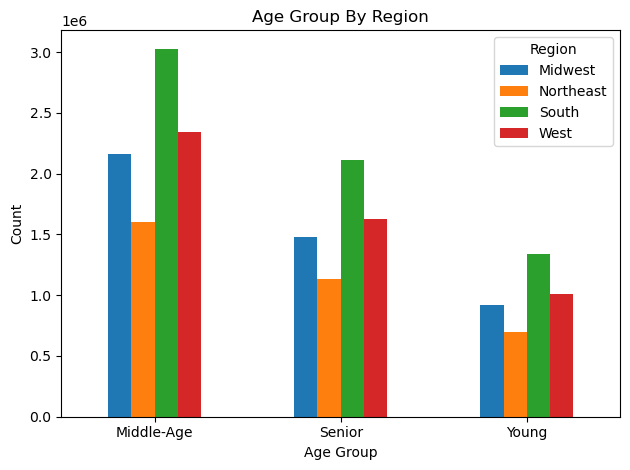

In [224]:
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [226]:
age_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_comparison_bar.png'))

### Create crosstab to compare age_group profile with customer frequency type

In [229]:
age_customer_frequency_comparison = pd.crosstab(big_ords_prods_agg_cust['age_group'],big_ords_prods_agg_cust['order_frequency'])

### Create a bar chart for age_group by customer frequency

<Figure size 1000x700 with 0 Axes>

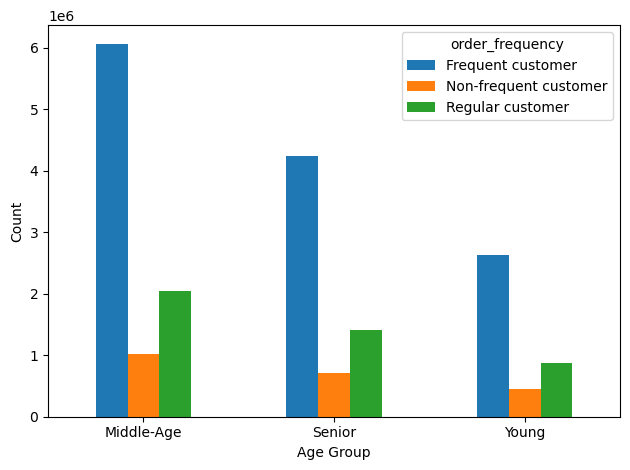

In [231]:
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison_bar= age_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [232]:
age_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_customer_frequency_comparison_bar.png'))

### Create crosstab bewtween age_group and loyalty_flag

In [234]:
age_group_loyalty_comparison = pd.crosstab(big_ords_prods_agg_cust['age_group'], big_ords_prods_agg_cust['loyalty_flag'], dropna=False)

### Create a bar chart for age_group by customer loyalty

<Figure size 1000x700 with 0 Axes>

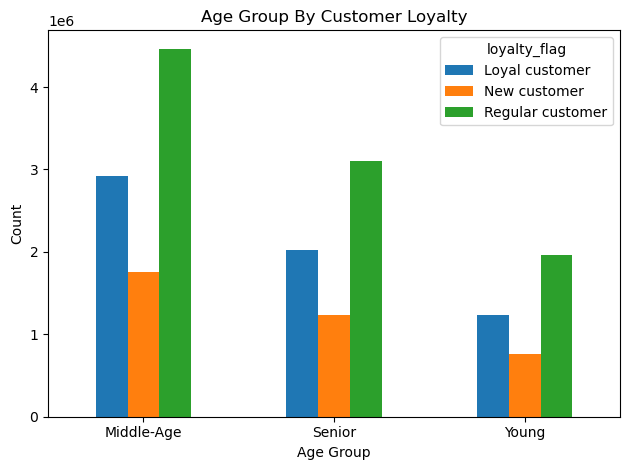

In [239]:
plt.figure(figsize=(10, 7))
age_group_loaylty_comparison_bar = age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [242]:
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_loaylty_comparison_bar.png'))

### Create a crosstab bewtween income_group and region

In [245]:
big_ords_prods_agg_cust['income_group'].value_counts(dropna=False)

income_group
Middle Income    10303944
High Income       4628404
Low Income        4512317
Name: count, dtype: int64

In [247]:
income_region_comparison = pd.crosstab(big_ords_prods_agg_cust['income_group'], big_ords_prods_agg_cust['region'], dropna=False)

### Create a bar chart for income group by region

<Figure size 1000x700 with 0 Axes>

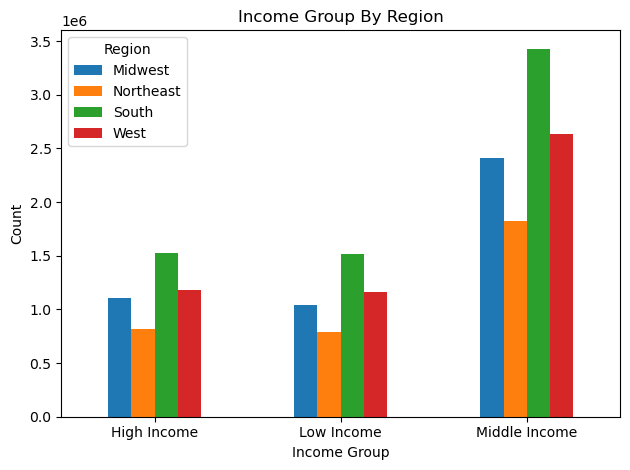

In [249]:
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [250]:
income_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_comparison_bar.png'))

### Create a crosstab and bar chart for dependent_size of customers by region

In [255]:
dependent_size_region_comparison = pd.crosstab(big_ords_prods_agg_cust['dependant_size'], big_ords_prods_agg_cust['region'], dropna=False)

<Figure size 1000x700 with 0 Axes>

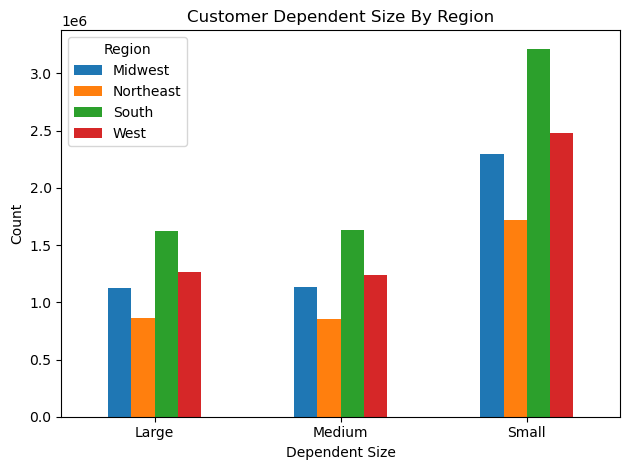

In [256]:
plt.figure(figsize=(10, 7))
dependent_size_region_comparison_bar= dependent_size_region_comparison.plot(kind='bar',rot=0)
plt.title('Customer Dependent Size By Region')
plt.xlabel('Dependent Size')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [259]:
dependent_size_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependent_size_region_comparison_bar.png'))

### Create a crosstab and bar chart for weekday order placement by region

In [262]:
week_day_category_region_comparison = pd.crosstab(big_ords_prods_agg_cust['week_day_category'], big_ords_prods_agg_cust['region'], dropna=False)

<Figure size 1000x700 with 0 Axes>

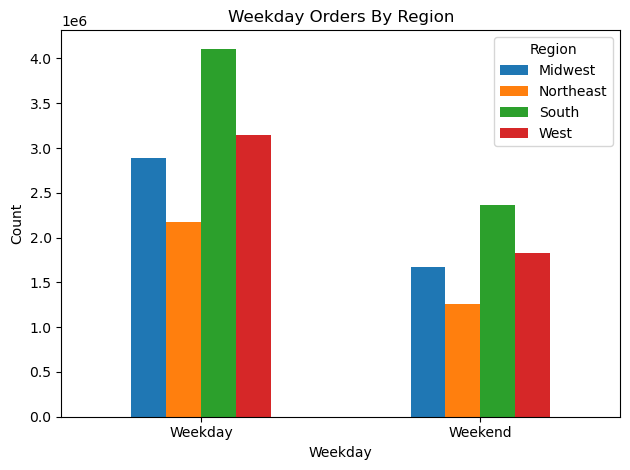

In [263]:
plt.figure(figsize=(10, 7))
week_day_category_region_comparison_bar = week_day_category_region_comparison.plot(kind='bar',rot=0)
plt.title('Weekday Orders By Region')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [266]:
week_day_category_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_category_region_comparison_bar.png'))

### Create a crosstab and bar chart for weekday order placement by region

In [269]:
order_hour_group_region_comparison = pd.crosstab(big_ords_prods_agg_cust['order_hour_group'],big_ords_prods_agg_cust['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

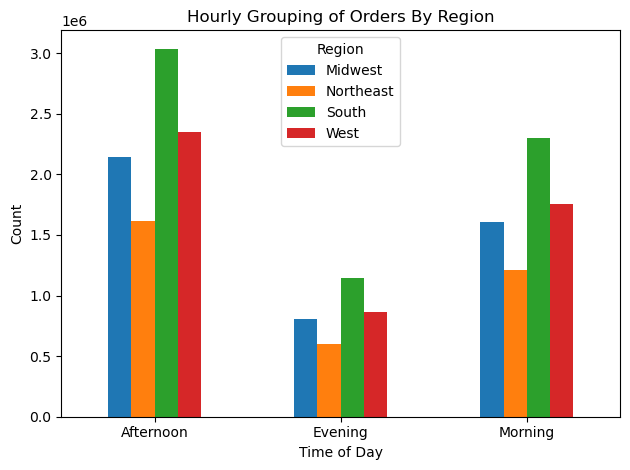

In [270]:
plt.figure(figsize=(10, 7))
order_hour_group_region_comparison_bar= order_hour_group_region_comparison.plot(kind='bar',rot=0)
plt.title('Hourly Grouping of Orders By Region')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [271]:
order_hour_group_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_hour_group_region_comparison_bar.png'))

### Create a crosstab and bar chart to compare region with order frequncy

In [273]:
big_ords_prods_agg_cust['order_frequency'].value_counts()

order_frequency
Frequent customer        12936806
Regular customer          4326387
Non-frequent customer     2181469
Name: count, dtype: int64

In [274]:
region_order_frequency_comparison = pd.crosstab(big_ords_prods_agg_cust['region'], big_ords_prods_agg_cust['order_frequency'])

<Figure size 1000x700 with 0 Axes>

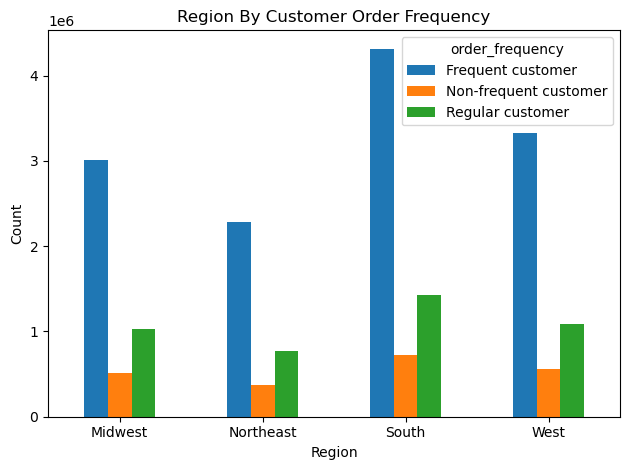

In [275]:
plt.figure(figsize=(10, 7))
region_order_frequency_comparison_bar= region_order_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Region By Customer Order Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [278]:
region_order_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_order_frequency_comparison_bar.png'))

### Create a crosstab and bar chart to compare region with spending_flag

In [282]:
region_spending_flag_comparison = pd.crosstab(big_ords_prods_agg_cust['region'], big_ords_prods_agg_cust['spending_flag'], dropna=False)

<Figure size 0x0 with 0 Axes>

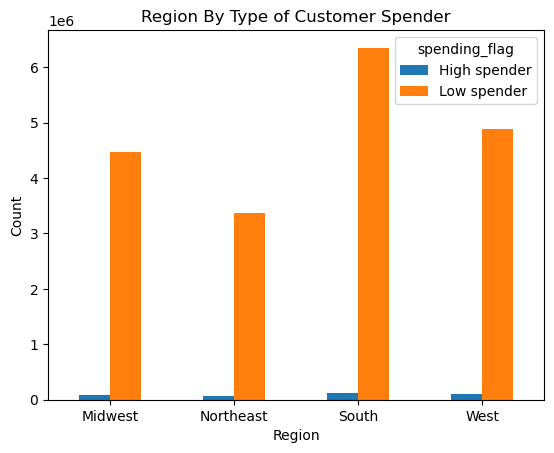

In [283]:
plt.figure(figsize=(0, 0))
region_spending_flag_comparison = region_spending_flag_comparison.plot(kind='bar', rot=0)
plt.title('Region By Type of Customer Spender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [284]:
region_spending_flag_comparison.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_spending_flag_comparison.png'))

### Create a crosstab and bar chart to compare loyalty_flag with spending_flag

In [292]:
loyalty_spending_flag_comparison = pd.crosstab(big_ords_prods_agg_cust['loyalty_flag'], big_ords_prods_agg_cust['spending_flag'], dropna=False)

<Figure size 0x0 with 0 Axes>

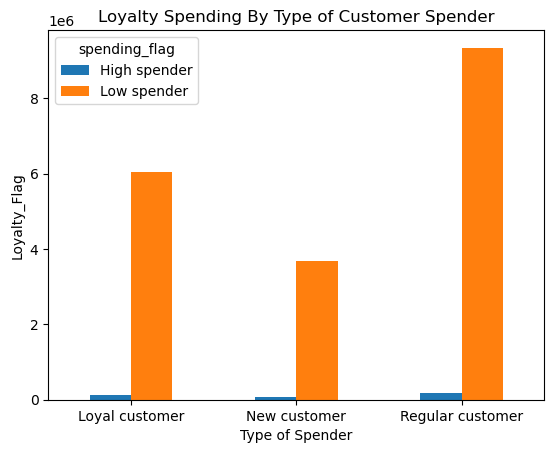

In [293]:
plt.figure(figsize=(0, 0))
loyalty_spending_flag_comparison_bar = loyalty_spending_flag_comparison.plot(kind='bar', rot=0)
plt.title('Loyalty Spending By Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Loyalty_Flag')
plt.show()

In [294]:
loyalty_spending_flag_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_spending_flag_comparison_bar.png'))

### Profiles compared with departments

In [296]:
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [297]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Rename unnamed column

In [300]:
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [306]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Change department_id from int64 to str for merge

In [309]:
df_dept['department_id'] = df_dept['department_id'].astype(str)

In [311]:
big_ords_prods_agg_cust['department_id'] = big_ords_prods_agg_cust['department_id'].astype(str)

Drop original merge column to merge department later

In [314]:
big_ords_prods_agg_cust = big_ords_prods_agg_cust.drop(columns=['_merge'])

In [315]:
big_ords_prods_agg_cust.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'days_most_busy',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency',
 'first_name',
 'last_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']

Merge df_dept to ords_prods_cust_merge via department_id

In [323]:
big_ords_prods_agg_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'big_ords_prods_agg_cust.pkl'))

In [325]:
df_dept.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_dept.pkl'))

In [327]:
big_ords_prods_agg_cust_dept = big_ords_prods_agg_cust.merge(df_dept,on='department_id',indicator=True)

MemoryError: Unable to allocate 3.33 GiB for an array with shape (23, 19444665) and data type object